# MGSC 662 Group Project - Postal Transportation Routing Optimization 
### Fall 2021 Group 21

Betty Au, Claire Cai, Jiahua Liang, Christina Ming, Ziye Zhang

### Note: 
The base problem formulation is the **Capacitated Vehicle Routing Problem with Time Windows (CVRPTW)** and the extension problem formulation is the **Capacitated Vehicle Routing Problem with Simultaneous Delivery and Pickup and with Time Windows (CVRPSDPTW)**. We started with basic TSP problem and regular Capacitated Vehicle Routing Problem (CVRP) and progressively build up our base model. The TSP and CVRP section of the code can be considered as warm-up and their results were used as comparsion to help us better understand the results of our base model. Therefore, feel free to drump directly to section 3 and 4 for grading purpose.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import gurobipy as gp
from gurobipy import *
import numpy as np
location=pd.read_csv('/Users/ziyezhang/Desktop/MMA/Courses Taken/Fall 2021/MGSC 662/Grp Proj/Submission/Places.csv')

## 1. Original TSP problem 
No constraints on vehicle capcity, customer demand and time

#### Parameters
$d_{ij}$: the Manhattan distance between location $i$ and $j$

$\{1,...,n\}$: a set of customer locations

$\{0\}$: depot

#### Decision Variables:  
$x_{ij}$: whether the vehicle travels from location $i$ to $j$ (arc)

$u_{i}$: represents the the number of steps needed to reach location $i$

​
$$
min \sum_{i=0}^{n} \sum_{j=0}^{n} d_{ij} x_{ij}
$$

s.t. 
​
$$
\sum_{i=0}^{n} x_{ij} = 1, j \in \{0, ..., n\}, (1.1)
$$
​
$$
\sum_{j=0}^{n} x_{ij} = 1, i \in \{0, ..., n\},  (1.2)
$$
​
$$
\sum_{i=0}^{n} x_{ii} = 0, i \in \{0, ..., n\}, (1.3)
$$
​
$$
u_{i} - u_{j} + (n+1)x_{ij}\leq n, i,j \in \{1, ..., n\}, (1.4)
$$
​
$$
1 \leq u_{i} \leq n, i \in \{1, ..., n\}, (1.5)
$$
​
$$
x_{ij} = \{0, 1\}, i, j \in \{0, ... n\},  (1.6)
$$
​

In [2]:
Customers=location.iloc[50:100,:]
Depot=pd.DataFrame(location.iloc[0,:])

In [3]:
df1=pd.concat([Depot.transpose(),Customers])
df1=df1[['identity','latitude','longitude']]

In [4]:
len(df1)

51

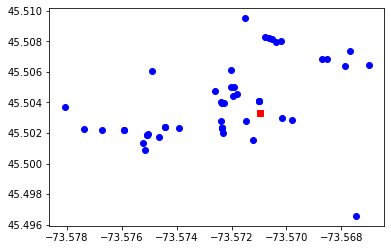

In [5]:
# Visualize locations
plt.plot(df1.longitude[0],df1.latitude[0],c='r',marker='s')
plt.scatter(df1.longitude[1:],df1.latitude[1:],c='b')

In [6]:
df1_array=np.array(df1.iloc[:,1:3])

In [7]:
# Calculate Manhattan distance for each pair of locations
from scipy.spatial.distance import cityblock
N=len(df1_array)
d_Manhattan=[]
for i in range(N):
    tls=[]
    for j in range(N):
        tls.append(cityblock(df1_array[i,:],df1_array[j,:]))
    d_Manhattan.append(tls)
    
# Manhattan Distance Matrix
d_Manhattan=np.asarray(d_Manhattan)

In [8]:
n = len(d_Manhattan)
n

51

In [9]:
model1 = gp.Model("TSP")

Academic license - for non-commercial use only - expires 2022-09-25
Using license file /Users/jiahua/gurobi.lic


In [10]:
# Define decision variables
x = model1.addVars(n, n, lb = 0, ub = 1, vtype= GRB.BINARY, name = ["x_"+str(i)+"_"+str(j) for i in range(n) for j in range(n)])
# dummy variables representing the number of steps needed to reach each location
u = model1.addVars(n, lb = 1, ub = n-1, vtype=GRB.INTEGER, name = ["u_"+str(i) for i in range(n)])

In [11]:
# Objective Function
model1.setObjective(sum(d_Manhattan[i,j]*x[i,j] for i in range(n) for j in range(n)), GRB.MINIMIZE)

In [12]:
# Add Constraints

# 1.1: must enter each location exactly once
for j in range(n):
    model1.addConstr(sum(x[i,j] for i in range(n)) ==1)
    
# 1.2: must exit each location exactly once    
for i in range(n):
    model1.addConstr(sum(x[i,j] for j in range(n)) ==1)

# 1.3: avoid self-loops
for i in range(n):
    model1.addConstr(x[i,i]==0)

# 1.4: avoid subtours
for i in range(1,n):
    for j in range(1,n):
        model1.addConstr(u[i]-u[j]+n*x[i,j] <= n-1)

In [13]:
model1.Params.LogToConsole = 0
model1.optimize()

In [14]:
# the conversion factor for location coordinates: 10,000km per 90 degrees. 
print(round(model1.objVal*(10000/90),2),'km')

7.05 km


In [15]:
for var in model1.getVars():
    if var.x > 0: # just print the non-zero decision variables 
        print(var.varName, "=", round(var.x,2))

x_0_44 = 1.0
x_1_8 = 1.0
x_2_42 = 1.0
x_3_2 = 1.0
x_4_3 = 1.0
x_5_6 = 1.0
x_6_11 = 1.0
x_7_10 = 1.0
x_8_7 = 1.0
x_9_36 = 1.0
x_10_35 = 1.0
x_11_23 = 1.0
x_12_13 = 1.0
x_13_9 = 1.0
x_14_40 = 1.0
x_15_0 = 1.0
x_16_15 = 1.0
x_17_20 = 1.0
x_18_16 = 1.0
x_19_14 = 1.0
x_20_19 = 1.0
x_21_4 = 1.0
x_22_21 = 1.0
x_23_38 = 1.0
x_24_18 = 1.0
x_25_29 = 1.0
x_26_27 = 1.0
x_27_24 = 1.0
x_28_26 = 1.0
x_29_28 = 1.0
x_30_33 = 1.0
x_31_25 = 1.0
x_32_31 = 1.0
x_33_32 = 1.0
x_34_5 = 1.0
x_35_34 = 1.0
x_36_1 = 1.0
x_37_12 = 1.0
x_38_39 = 1.0
x_39_30 = 1.0
x_40_41 = 1.0
x_41_50 = 1.0
x_42_17 = 1.0
x_43_22 = 1.0
x_44_45 = 1.0
x_45_43 = 1.0
x_46_49 = 1.0
x_47_48 = 1.0
x_48_37 = 1.0
x_49_47 = 1.0
x_50_46 = 1.0
u_0 = 1.0
u_1 = 26.0
u_2 = 8.0
u_3 = 7.0
u_4 = 6.0
u_5 = 32.0
u_6 = 33.0
u_7 = 28.0
u_8 = 27.0
u_9 = 24.0
u_10 = 29.0
u_11 = 34.0
u_12 = 22.0
u_13 = 23.0
u_14 = 13.0
u_15 = 50.0
u_16 = 49.0
u_17 = 10.0
u_18 = 48.0
u_19 = 12.0
u_20 = 11.0
u_21 = 5.0
u_22 = 4.0
u_23 = 35.0
u_24 = 47.0
u_25 = 42.0
u_26 = 45.

In [16]:
# show optimal route
print("The Optimal Delivery Route")
cycle = [0, " > "]
k = 0
for i in range(1,n):
    for j in range(1,n):
        name = 'x_'+str(k)+'_'+str(j)
        if model1.getVarByName(name).x >0:
            cycle.append(j)
            cycle.append(" > ")
            k=j
        
cycle.append(0)
print(*cycle, sep="")

The Optimal Delivery Route
0 > 44 > 45 > 43 > 22 > 21 > 4 > 3 > 2 > 42 > 17 > 20 > 19 > 14 > 40 > 41 > 50 > 46 > 49 > 47 > 48 > 37 > 12 > 13 > 9 > 36 > 1 > 8 > 7 > 10 > 35 > 34 > 5 > 6 > 11 > 23 > 38 > 39 > 30 > 33 > 32 > 31 > 25 > 29 > 28 > 26 > 27 > 24 > 18 > 16 > 15 > 0


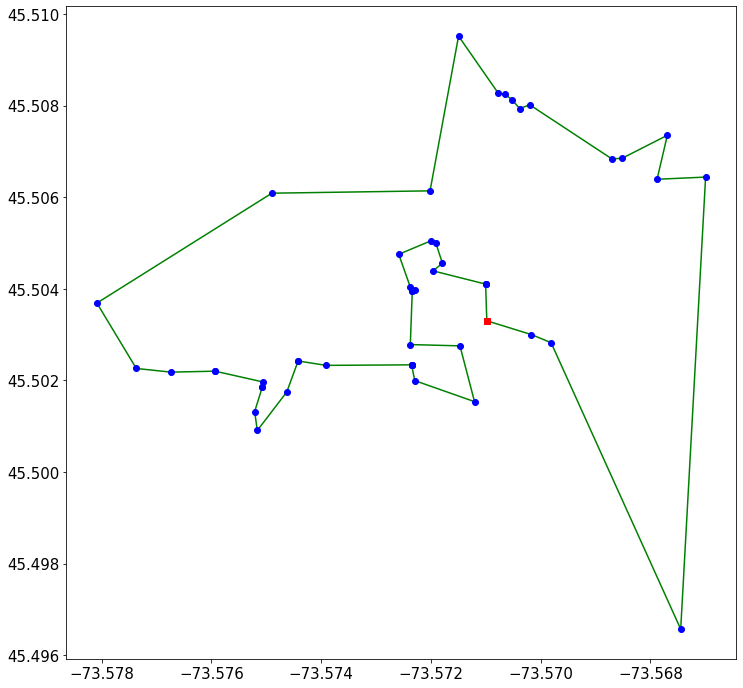

In [17]:
# Visualize optimal route
active_arcs = [a for a in [(i,j) for i in range(N) for j in range(N)] if x[a].x > 0]
yc=df1_array[:,0]
xc=df1_array[:,1]
plt.figure(figsize=(12,12))
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
for i, j in active_arcs:
    plt.plot([xc[i], xc[j]], [yc[i], yc[j]], c='g', zorder=0)
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c='b')

## 2. Capcitated Vehicle Routing Problem (CVRP) 

On top of original TSP in section 1, each vehicle has limited capacity, each customer location has specific delivery demand

#### Parameters
$d_{ij}$: the Manhattan distance between location $i$ and $j$

$q_{i}$: the delivery demand of customer $i$  

$Q$: vehicle capacity  

$\{1,...,n\}$: a set of costomers

$\{0\}$: depot

#### Decision Variables:  
$x_{ij}$: whether the vehicle travels from location $i$ to $j$ (arc)

$y_{i}$: cumulative delivery demand that has been delivered after reaching location $i$

​
$$
min \sum_{i=0}^{n} \sum_{j=0}^{n} d_{ij} x_{ij}
$$

s.t. 
​
$$
\sum_{i=0}^{n} x_{ij} = 1, j \in \{1, ..., n\}, (2.1)
$$
​
$$
\sum_{j=0}^{n} x_{ij} = 1, i \in \{1, ..., n\},  (2.2)
$$
​
$$
\sum_{i=0}^{n} x_{ii} = 0, i \in \{0, ..., n\}, (2.3)
$$
​
$$
y_{j} \geq y_{i} + q_{j}x_{ij} - Q(1-x_{ij}), i,j \in \{1, ..., n\}, (2.4)
$$
​
$$
q_{i} \leq y_{i} \leq Q, i \in \{1, ..., n\}, (2.5)
$$
​
$$
x_{ij} = \{0, 1\}, i, j \in \{0, ... n\},  (2.6)
$$
​

In [18]:
Customers=location.iloc[50:100,:]
Depot=pd.DataFrame(location.iloc[0,:])
df2=pd.concat([Depot.transpose(),Customers])
df2=df2[['identity','latitude','longitude']]

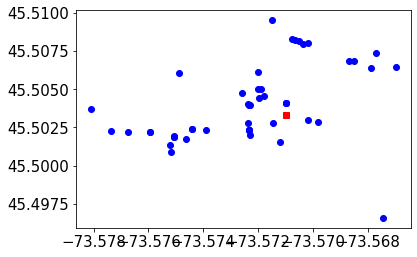

In [19]:
# Visualize locations
plt.plot(df2.longitude[0],df1.latitude[0],c='r',marker='s')
plt.scatter(df2.longitude[1:],df1.latitude[1:],c='b')

In [20]:
df2_array=np.array(df2.iloc[:,1:3])

In [21]:
# Calculate Manhattan distance for each pair of locations
from scipy.spatial.distance import cityblock
N=len(df2_array)
d_Manhattan=[]
for i in range(N):
    tls=[]
    for j in range(N):
        tls.append(cityblock(df2_array[i,:],df2_array[j,:]))
    d_Manhattan.append(tls)

# Manhattan Distance Matrix    
d_Manhattan=np.asarray(d_Manhattan)

In [22]:
n = len(d_Manhattan)
n

51

In [23]:
# The capacity of a delivery vehicle
Q = 50  
# simulation of customer delivery demand
np.random.seed(0)
q = {i: np.random.choice(np.arange(1,8),p=[0.5,0.25,0.15,0.05,0.025,0.015,0.01]) for i in range(1, n)}

In [24]:
model2 = gp.Model("CVRP")

In [25]:
# Define decision variables
# representing an arc from location i to j
x = model2.addVars(n, n, lb = 0, ub = 1, vtype= GRB.BINARY, name = ["x_"+str(i)+"_"+str(j) for i in range(n) for j in range(n)])
# representing the cumulative demand that has been delivered after reaching each location
y = model2.addVars(n, lb = 0, vtype=GRB.CONTINUOUS, name = ["y_"+str(i) for i in range(n)])

In [26]:
# Objective Function
model2.setObjective(sum(d_Manhattan[i,j]*x[i,j] for i in range(n) for j in range(n)), GRB.MINIMIZE)

In [27]:
# Add constraints

# 2.1: must enter each *customer* location exactly once (excluding the depot)
for j in range(1,n):
    model2.addConstr(sum(x[i,j] for i in range(n)) == 1)
    
# 2.2: must exit each *customer* location exactly once (excluding the depot)
for i in range(1,n):
    model2.addConstr(sum(x[i,j] for j in range(n)) == 1)

# 2.3: avoid self-loops
for i in range(n):
    model2.addConstr(x[i,i] == 0)
    
# 2.4: update cumulative delivery and avoid subtours
for i in range(1,n):
    for j in range(1,n):
        model2.addConstr(y[j] >= y[i]+q[j]*x[i,j] - Q*(1-x[i,j]))

# 2.5: constraints on the cumulative delivery
for i in range(1, n):
    model2.addConstr(y[i] >= q[i])
    model2.addConstr(y[i] <= Q)

In [28]:
model2.Params.MIPGap = 0.1
model2.Params.TimeLimit = 1000  # runtime limit in seconds
model2.optimize()

Changed value of parameter MIPGap to 0.1
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Changed value of parameter TimeLimit to 1000.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 2751 rows, 2652 columns and 12651 nonzeros
Model fingerprint: 0x4cd5cb54
Variable types: 51 continuous, 2601 integer (2601 binary)
Coefficient statistics:
  Matrix range     [1e+00, 6e+01]
  Objective range  [1e-06, 2e-02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 5e+01]
Found heuristic solution: objective 0.4204809
Presolve removed 201 rows and 52 columns
Presolve time: 0.03s
Presolved: 2550 rows, 2600 columns, 12350 nonzeros
Variable types: 50 continuous, 2550 integer (2550 binary)

Root relaxation: objective 4.852777e-02, 161 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl 

*34852 15669             251       0.0715669    0.06252  12.6%  13.9  327s
 35121 15918    0.06681   70   50    0.07157    0.06256  12.6%  13.9  330s
 35829 16167    0.06458   30   93    0.07157    0.06264  12.5%  14.0  335s
 36726 16563    0.06347   58   71    0.07157    0.06270  12.4%  14.0  340s
 37807 17167    0.07114   88   38    0.07157    0.06273  12.3%  14.0  345s
 38799 17973    0.06388   65   71    0.07157    0.06274  12.3%  14.0  350s
 39661 18597    0.06927   74   38    0.07157    0.06274  12.3%  14.1  355s
 40808 19470    0.06577  102   68    0.07157    0.06274  12.3%  14.2  361s
 41241 19764    0.06753   71   61    0.07157    0.06274  12.3%  14.2  367s
H41404 13425                       0.0687705    0.06274  8.76%  14.2  367s

Cutting planes:
  Learned: 14
  Gomory: 23
  Cover: 30
  Implied bound: 13
  Projected implied bound: 41
  Clique: 3
  MIR: 36
  StrongCG: 2
  Flow cover: 137
  Inf proof: 4
  Zero half: 38
  RLT: 12
  Relax-and-lift: 26

Explored 41405 nodes (58870

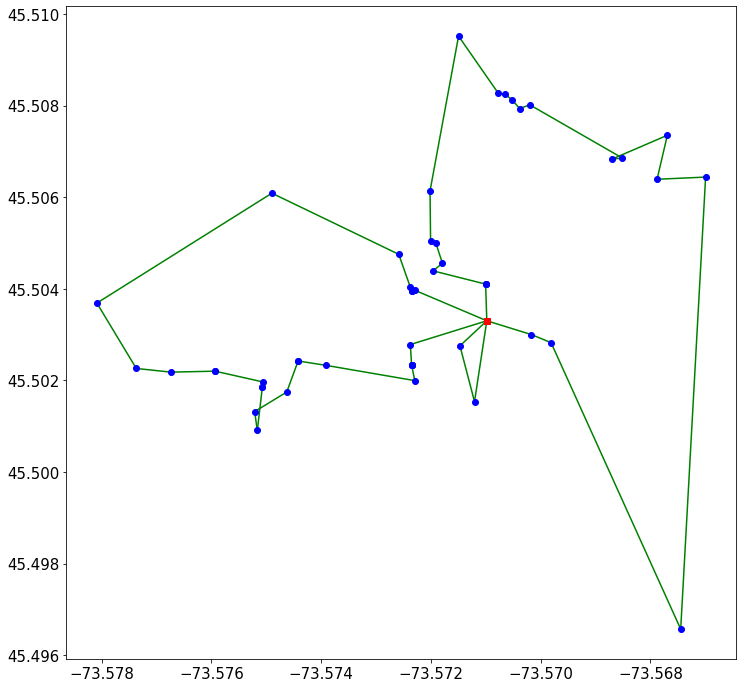

In [29]:
active_arcs = [a for a in [(i,j) for i in range(n) for j in range(n)] if x[a].x > 0.99]
yc=df2_array[:,0]
xc=df2_array[:,1]
plt.figure(figsize=(12,12))
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
for i, j in active_arcs:
    plt.plot([xc[i], xc[j]], [yc[i], yc[j]], c='g', zorder=0)
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c='b')

In [30]:
# the conversion factor for location coordinates: 10,000km per 90 degrees. 
print(round(model2.objVal*(10000/90),2),'km')

7.64 km


In [31]:
for var in model2.getVars():
    if var.x > 0: # just print the decision variables that really matters(non zero)
        print(var.varName, "=", round(var.x,2))

x_0_14 = 1.0
x_0_41 = 1.0
x_0_44 = 1.0
x_1_36 = 1.0
x_2_42 = 1.0
x_3_38 = 1.0
x_4_3 = 1.0
x_5_6 = 1.0
x_6_11 = 1.0
x_7_10 = 1.0
x_8_7 = 1.0
x_9_1 = 1.0
x_10_35 = 1.0
x_11_23 = 1.0
x_12_13 = 1.0
x_13_9 = 1.0
x_14_48 = 1.0
x_15_0 = 1.0
x_16_15 = 1.0
x_17_0 = 1.0
x_18_16 = 1.0
x_19_17 = 1.0
x_20_19 = 1.0
x_21_4 = 1.0
x_22_21 = 1.0
x_23_2 = 1.0
x_24_18 = 1.0
x_25_28 = 1.0
x_26_27 = 1.0
x_27_24 = 1.0
x_28_29 = 1.0
x_29_26 = 1.0
x_30_33 = 1.0
x_31_25 = 1.0
x_32_31 = 1.0
x_33_32 = 1.0
x_34_5 = 1.0
x_35_34 = 1.0
x_36_8 = 1.0
x_37_12 = 1.0
x_38_39 = 1.0
x_39_30 = 1.0
x_40_0 = 1.0
x_41_40 = 1.0
x_42_20 = 1.0
x_43_22 = 1.0
x_44_45 = 1.0
x_45_43 = 1.0
x_46_47 = 1.0
x_47_49 = 1.0
x_48_46 = 1.0
x_49_50 = 1.0
x_50_37 = 1.0
y_1 = 23.0
y_2 = 42.0
y_3 = 18.0
y_4 = 16.0
y_5 = 34.0
y_6 = 36.0
y_7 = 29.0
y_8 = 28.0
y_9 = 21.0
y_10 = 30.0
y_11 = 39.0
y_12 = 14.0
y_13 = 16.0
y_14 = 4.0
y_15 = 50.0
y_16 = 49.0
y_17 = 50.0
y_18 = 48.0
y_19 = 49.0
y_20 = 46.0
y_21 = 14.0
y_22 = 8.0
y_23 = 40.0
y_24 = 45.0
y_25 

In [32]:
# get the non-zero decision variable names
var_name = [var.varName for var in model2.getVars() if var.x > 0]

In [33]:
# get the decision variable names that start with "x_0_"
x_0_ = [varname for varname in var_name if "x_0_" in varname]

In [34]:
# show the optimal route for each vehicle
count = 1
for i in x_0_:
    end = i.split("_")[2] 
    route = [0, " > "]
    for k in range(len(x_0_)+n-1):
        for j in var_name[:len(x_0_)+n-1]:
            start = j.split("_")[1]
            if start == end:
                route.append(int(start))
                route.append(" > ")
                end = j.split("_")[2]
        if end == "0":
            break
     
    route.append(0)
    print("The optimal delivery route for vehicle "+str(count))
    print(*route, sep="")
    count += 1        

The optimal delivery route for vehicle 1
0 > 14 > 48 > 46 > 47 > 49 > 50 > 37 > 12 > 13 > 9 > 1 > 36 > 8 > 7 > 10 > 35 > 34 > 5 > 6 > 11 > 23 > 2 > 42 > 20 > 19 > 17 > 0
The optimal delivery route for vehicle 2
0 > 41 > 40 > 0
The optimal delivery route for vehicle 3
0 > 44 > 45 > 43 > 22 > 21 > 4 > 3 > 38 > 39 > 30 > 33 > 32 > 31 > 25 > 28 > 29 > 26 > 27 > 24 > 18 > 16 > 15 > 0


## 3. Base Problem: Capcitated Vehicle Routing Problem with Time Windows (CVRPTW)

On top of CVRP in section 2, customers can specify time windows for delivery, customer service time and traveling time are added to the formulation

#### Parameters
$d_{ij}$: the Manhattan distance between location $i$ and $j$

$q_{i}$: the delivery demand of customer $i$  

$Q$: vehicle capacity  

$w^a_{i}$: start of time window for customer $i$ 

$w^b_{i}$: end of time window for customer $i$

$s_{i}$: service time for customer $i$

$t_{ij}$: travel time from location $i$ to $j$

$\{1,...,n\}$: a set of customers

$\{0\}$: depot

#### Decision Variables:  
$x_{ij}$: whether the vehicle travels from location $i$ to $j$ (arc)

$y_{i}$: cumulative delivery demand that has been delivered after reaching location $i$

$w_{i}$: service start time for customer $i$

​
$$
min \sum_{i=0}^{n} \sum_{j=0}^{n} d_{ij} x_{ij}
$$

s.t. 
​
$$
\sum_{i=0}^{n} x_{ij} = 1, j \in \{1, ..., n\}, (3.1)
$$
​
$$
\sum_{j=0}^{n} x_{ij} = 1, i \in \{1, ..., n\},  (3.2)
$$
​
$$
\sum_{i=0}^{n} x_{ii} = 0, i \in \{0, ..., n\}, (3.3)
$$
​
$$
y_{j} \geq y_{i} + q_{j}x_{ij} - Q(1-x_{ij}), i,j \in \{1, ..., n\}, (3.4)
$$
​
$$
q_{i} \leq y_{i} \leq Q, i \in \{1, ..., n\}, (3.5)
$$
​
$$
w_{j} \geq w_{i} + (s_{i} + t_{ij})x_{ij} - M(1-x_{ij}), i \in \{0, ..., n\},j \in \{1, ..., n\} (3.6)
$$
​
$$
w^a_{i} \leq w_{i} \leq w^b_{i}, i \in \{0, ..., n\}, (3.7)
$$
​
$$
x_{ij} = \{0, 1\}, i, j \in \{0, ... n\},  (3.8)
$$
​

In [35]:
Customers=location.iloc[50:100,:]
Depot=pd.DataFrame(location.iloc[0,:])
df3=pd.concat([Depot.transpose(),Customers])
df3=df3[['identity','latitude','longitude']]

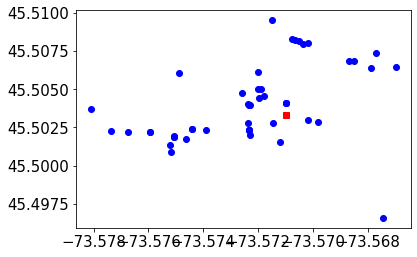

In [36]:
# Visualize locations
plt.plot(df3.longitude[0],df3.latitude[0],c='r',marker='s')
plt.scatter(df3.longitude[1:],df3.latitude[1:],c='b')

In [37]:
df3_array=np.array(df3.iloc[:,1:3])

In [38]:
# Calculate Manhattan distance for each pair of locations
from scipy.spatial.distance import cityblock
N=len(df3_array)
d_Manhattan=[]
for i in range(N):
    tls=[]
    for j in range(N):
        tls.append(cityblock(df3_array[i,:],df3_array[j,:]))
    d_Manhattan.append(tls)

# Manhattan Distance Matrix    
d_Manhattan=np.asarray(d_Manhattan)

In [39]:
n = len(d_Manhattan)
n

51

In [40]:
# The capacity of a delivery vehicle
Q = 50  
# simulate customer delivery demand
np.random.seed(0)
q = {i: np.random.choice(np.arange(1,8),p=[0.5,0.25,0.15,0.05,0.025,0.015,0.01]) for i in range(1, n)}

In [41]:
# Simulate Time Windows
np.random.seed(0)
# start of time window
w_a = [0] + [np.random.choice([9,10,11],p=[0.6,0.3,0.1]) for i in range(1,n)] # in hours, 9 means 9 am
np.random.seed(0)
# end of time window
w_b = [0] + [np.random.choice([12,13,14],p=[1/3,1/3,1/3]) for i in range(1,n)] # in hours, 12 means 12 pm
np.random.seed(0)
# simulate service time at each location (amount of time that the vehicle has to stay in that location)
s = [0] + [np.random.choice([5/60,10/60,15/60],p=[0.6,0.3,0.1]) for i in range(1,n)] # in hours, 15/60 hours means 15 minutes
# approximate travel time matrix in hours (assume average travel speed = 30 km/h)
t = d_Manhattan*(10000/90)/30

In [42]:
d_Manhattan[0]

array([0.        , 0.00621256, 0.0030554 , 0.0027667 , 0.0026269 ,
       0.006877  , 0.0074277 , 0.0055301 , 0.0055301 , 0.0052    ,
       0.0054135 , 0.0074913 , 0.0043157 , 0.0043157 , 0.001913  ,
       0.0011157 , 0.001649  , 0.0019668 , 0.010264  , 0.0020179 ,
       0.0020179 , 0.0020643 , 0.002071  , 0.00670107, 0.0071232 ,
       0.00549654, 0.0073386 , 0.0061911 , 0.00602269, 0.0058135 ,
       0.0051758 , 0.0052318 , 0.0052834 , 0.005279  , 0.0060503 ,
       0.0060503 , 0.0065765 , 0.003901  , 0.0038703 , 0.00672771,
       0.0010371 , 0.0019891 , 0.00212798, 0.0008216 , 0.0008205 ,
       0.0008205 , 0.0023324 , 0.0023324 , 0.0023324 , 0.0023324 ,
       0.002619  ])

In [43]:
t[0]

array([0.        , 0.02300948, 0.0113163 , 0.01024704, 0.00972926,
       0.02547037, 0.02751   , 0.02048185, 0.02048185, 0.01925926,
       0.02005   , 0.02774556, 0.01598407, 0.01598407, 0.00708519,
       0.00413222, 0.00610741, 0.00728444, 0.03801481, 0.0074737 ,
       0.0074737 , 0.00764556, 0.00767037, 0.02481878, 0.02638222,
       0.02035756, 0.02718   , 0.02293   , 0.02230626, 0.02153148,
       0.01916963, 0.01937704, 0.01956815, 0.01955185, 0.02240852,
       0.02240852, 0.02435741, 0.01444815, 0.01433444, 0.02491744,
       0.00384111, 0.00736704, 0.00788141, 0.00304296, 0.00303889,
       0.00303889, 0.00863852, 0.00863852, 0.00863852, 0.00863852,
       0.0097    ])

In [44]:
model3 = gp.Model("CVRPTW")

In [45]:
# Define decision variables

# representing an arc from location i to j
x = model3.addVars(n, n, lb = 0, ub = 1, vtype= GRB.BINARY, name = ["x_"+str(i)+"_"+str(j) for i in range(n) for j in range(n)])
# representing the cumulative demand that has been delivered after reaching each location
y = model3.addVars(n, lb = 0, vtype=GRB.CONTINUOUS, name = ["y_"+str(i) for i in range(n)])
# representing the time instant that the service starts at location i
w = model3.addVars(n, lb = 0, vtype=GRB.CONTINUOUS, name = ["w_"+str(i) for i in range(n)])
# a large number 
M = 10000

In [46]:
# Objective Function
model3.setObjective(sum(d_Manhattan[i,j]*x[i,j] for i in range(n) for j in range(n)), GRB.MINIMIZE)

In [47]:
# Add constraints

# 3.1: must enter each *customer* location exactly once (excluding the depot)
for j in range(1,n):
    model3.addConstr(sum(x[i,j] for i in range(n)) == 1)
    
# 3.2: must exit each *customer* location exactly once (excluding the depot)
for i in range(1,n):
    model3.addConstr(sum(x[i,j] for j in range(n)) == 1)

# 3.3: avoid self-loops
for i in range(n):
    model3.addConstr(x[i,i] == 0)
     
# 3.4: update cumulative delivery and avoid subtours (from demand perspective)
for i in range(1,n):
    for j in range(1,n):
        model3.addConstr(y[j] >= y[i]+q[j]*x[i,j] - Q*(1-x[i,j]))

# 3.5: Constraints on the cumulative delivery, ensure that the vehicle capacity is not exceeded
for i in range(1,n):
    model3.addConstr(y[i] >= q[i])
    model3.addConstr(y[i] <= Q)

# 3.6: update service start time and avoid subtours (from time perspective)
for i in range(n):
    for j in range(1,n):
        model3.addConstr(w[j] >= w[i] + (s[i]+ t[i,j])*x[i,j] - M * (1-x[i,j]))

# 3.7: constraints on serivce start time, must be within time window  
for i in range(n):
    model3.addConstr(w[i] >= w_a[i])
    model3.addConstr(w[i] <= w_b[i])

In [48]:
model3.Params.MIPGap = 0.1
model3.Params.TimeLimit = 1000  # seconds
model3.optimize()

Changed value of parameter MIPGap to 0.1
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Changed value of parameter TimeLimit to 1000.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 5403 rows, 2703 columns and 20303 nonzeros
Model fingerprint: 0x38849770
Variable types: 102 continuous, 2601 integer (2601 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+04]
  Objective range  [1e-06, 2e-02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+04]
Found heuristic solution: objective 0.3881562
Presolve removed 403 rows and 53 columns
Presolve time: 0.05s
Presolved: 5000 rows, 2650 columns, 19700 nonzeros
Variable types: 100 continuous, 2550 integer (2550 binary)

Root relaxation: objective 4.853306e-02, 194 iterations, 0.01 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Exp

 14911  8973    0.06450   58   58    0.06960    0.06208  10.8%  34.9  365s
 14942  8987    0.06903   61   38    0.06960    0.06208  10.8%  34.9  370s
 15074  9031    0.06208   73  106    0.06960    0.06208  10.8%  34.8  375s
 15309  9155    0.06208   60  104    0.06960    0.06208  10.8%  34.6  380s
 15369  9194    0.06208   86   99    0.06960    0.06208  10.8%  34.5  385s
 15594  9347    0.06572  165   33    0.06960    0.06208  10.8%  34.3  390s
 15790  9376    0.06208   50   69    0.06960    0.06208  10.8%  34.2  395s
 16051  9493 infeasible   47         0.06960    0.06208  10.8%  34.1  400s
 16404  9616    0.06627   61   51    0.06960    0.06208  10.8%  34.1  405s
 16639  9729    0.06371   44   80    0.06960    0.06208  10.8%  34.1  411s
 16856  9826    0.06208   41   58    0.06960    0.06208  10.8%  34.0  417s
 17011  9887    0.06611   66   86    0.06960    0.06208  10.8%  33.9  420s
 17316  9976    0.06208   42   54    0.06960    0.06208  10.8%  33.8  425s
 17729 10126    0.06510  

 57568 25642    0.06703   51  102    0.06960    0.06208  10.8%  36.9  920s
 57935 25883    0.06432   52   67    0.06960    0.06208  10.8%  37.0  925s
 58395 26179    0.06512   53   52    0.06960    0.06208  10.8%  37.0  931s
 58873 26537    0.06581   55   28    0.06960    0.06208  10.8%  36.9  937s
 59318 26807    0.06656   54   48    0.06960    0.06208  10.8%  36.9  942s
 59766 27054     cutoff   58         0.06960    0.06208  10.8%  36.9  946s
 60191 27266    0.06512   53   91    0.06960    0.06208  10.8%  37.0  952s
 60408 27380    0.06858   66   69    0.06960    0.06208  10.8%  37.0  955s
 60936 27684    0.06734   54   63    0.06960    0.06208  10.8%  37.0  961s
 61363 27925    0.06895   86   41    0.06960    0.06208  10.8%  37.0  965s
 62027 28264     cutoff   71         0.06960    0.06208  10.8%  37.0  971s
 62454 28505    0.06435   51   86    0.06960    0.06208  10.8%  37.1  975s
 63070 28871    0.06483   65   80    0.06960    0.06208  10.8%  37.2  981s
 63460 29100    0.06273  

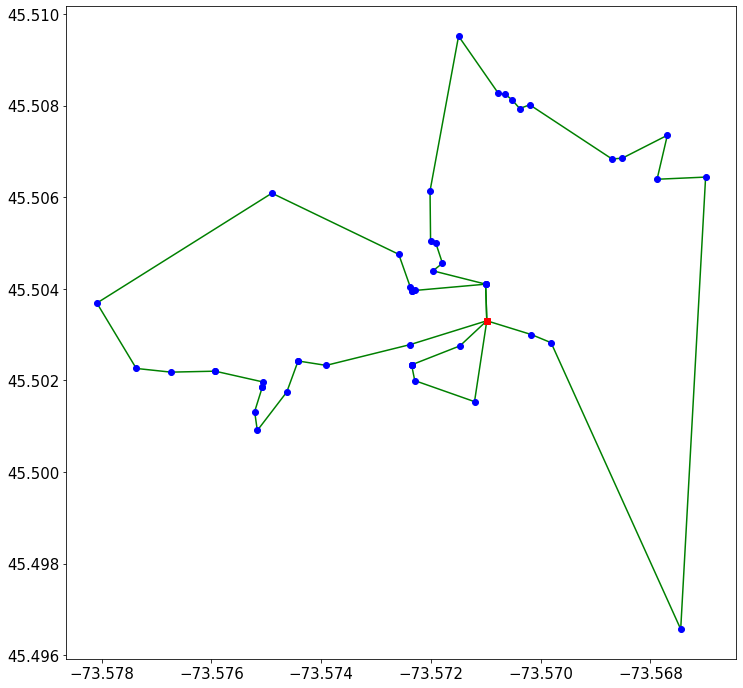

In [49]:
active_arcs = [a for a in [(i,j) for i in range(n) for j in range(n)] if x[a].x > 0.99]
yc=df3_array[:,0]
xc=df3_array[:,1]
plt.figure(figsize=(12,12))
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
for i, j in active_arcs:
    plt.plot([xc[i], xc[j]], [yc[i], yc[j]], c='g', zorder=0)
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c='b')

In [50]:
# the conversion factor for location coordinates: 10,000km per 90 degrees. 
print(round(model3.objVal*(10000/90),2),'km')

7.73 km


In [51]:
for var in model3.getVars():
    if var.x > 0: # just print the decision variables that really matters(non zero)
        print(var.varName, "=", round(var.x,2))

x_0_15 = 1.0
x_0_40 = 1.0
x_0_44 = 1.0
x_1_36 = 1.0
x_2_23 = 1.0
x_3_4 = 1.0
x_4_21 = 1.0
x_5_35 = 1.0
x_6_5 = 1.0
x_7_8 = 1.0
x_8_1 = 1.0
x_9_13 = 1.0
x_10_7 = 1.0
x_11_6 = 1.0
x_12_37 = 1.0
x_13_12 = 1.0
x_14_0 = 1.0
x_15_16 = 1.0
x_16_18 = 1.0
x_17_19 = 1.0
x_18_24 = 1.0
x_19_20 = 1.0
x_20_42 = 1.0
x_21_22 = 1.0
x_22_43 = 1.0
x_23_11 = 1.0
x_24_27 = 1.0
x_25_31 = 1.0
x_26_28 = 1.0
x_27_26 = 1.0
x_28_29 = 1.0
x_29_25 = 1.0
x_30_39 = 1.0
x_31_32 = 1.0
x_32_33 = 1.0
x_33_30 = 1.0
x_34_10 = 1.0
x_35_34 = 1.0
x_36_9 = 1.0
x_37_14 = 1.0
x_38_3 = 1.0
x_39_38 = 1.0
x_40_49 = 1.0
x_41_0 = 1.0
x_42_2 = 1.0
x_43_45 = 1.0
x_44_17 = 1.0
x_45_0 = 1.0
x_46_48 = 1.0
x_47_50 = 1.0
x_48_47 = 1.0
x_49_46 = 1.0
x_50_41 = 1.0
y_1 = 33.0
y_2 = 16.0
y_3 = 32.0
y_4 = 34.0
y_5 = 23.0
y_6 = 22.0
y_7 = 28.0
y_8 = 31.0
y_9 = 40.0
y_10 = 27.0
y_11 = 20.0
y_12 = 44.0
y_13 = 42.0
y_14 = 50.0
y_15 = 1.0
y_16 = 2.0
y_17 = 2.0
y_18 = 5.0
y_19 = 5.0
y_20 = 13.0
y_21 = 40.0
y_22 = 43.0
y_23 = 17.0
y_24 = 8.0
y_25 = 18

In [52]:
var_name = [var.varName for var in model3.getVars() if var.x > 0]

In [53]:
x_0_ = [varname for varname in var_name if "x_0_" in varname]

In [54]:
# show the optimal route for each vehicle
count = 1
for i in x_0_:
    end = i.split("_")[2] 
    route = [0, " > "]
    for k in range(len(x_0_)+n-1):
        for j in var_name[:len(x_0_)+n-1]:
            start = j.split("_")[1]
            if start == end:
                route.append(int(start))
                route.append(" > ")
                end = j.split("_")[2]
        if end == "0":
            break
     
    route.append(0)
    print("The optimal delivery route for vehicle "+str(count))
    print(*route, sep="")
    count += 1        

The optimal delivery route for vehicle 1
0 > 15 > 16 > 18 > 24 > 27 > 26 > 28 > 29 > 25 > 31 > 32 > 33 > 30 > 39 > 38 > 3 > 4 > 21 > 22 > 43 > 45 > 0
The optimal delivery route for vehicle 2
0 > 40 > 49 > 46 > 48 > 47 > 50 > 41 > 0
The optimal delivery route for vehicle 3
0 > 44 > 17 > 19 > 20 > 42 > 2 > 23 > 11 > 6 > 5 > 35 > 34 > 10 > 7 > 8 > 1 > 36 > 9 > 13 > 12 > 37 > 14 > 0


## 4. Extension: CVRP with Simultaneous Delivery and Pickup and with Time Windows (CVRPSDPTW)

On top of CVRPTW in section 3, parcel pickup service is added to the formulation

#### Parameters
$d_{ij}$: the Manhattan distance between locations $i$ and $j$

$q_{i}$: the delivery demand of customer $i$  

$b_{i}$: the pickup demand of customer $i$  

$Q$: vehicle capacity  

$w^a_{i}$: start of time window for customer $i$ 

$w^b_{i}$: end of time window for customer $i$

$s_{i}$: service time for customer $i$

$t_{ij}$: travel time from location $i$ to $j$

$\{1,...,n\}$: a set of customers

$\{0\}$: depot

#### Decision Variables:  
$x_{ij}$: whether the vehicle travels from location $i$ to $j$ (arc)

$R_{ij}$: the total delivery amount on vehicle on arc $(i,j)$  

$P_{ij}$: the total pickup amount on vehicle on arc $(i,j)$  

$w_{i}$: time dummy variables (service start time for customer $i$)

​
$$
min \sum_{i=0}^{n} \sum_{j=0}^{n} d_{ij} x_{ij}
$$

s.t. 
​
$$
\sum_{i=0}^{n} x_{ij} = 1, j \in \{1, ..., n\}, (4.1)
$$
​
$$
\sum_{j=0}^{n} x_{ij} = 1, i \in \{1, ..., n\},  (4.2)
$$
​
$$
\sum_{i=0}^{n} x_{ii} = 0, i \in \{0, ..., n\}, (4.3)
$$
​
$$
\sum_{i=0}^{n} R_{ij} - q_{j} = \sum_{i=0}^{n} R_{ji}, j \in \{1, ..., n\}, (4.4)
$$
​
$$
\sum_{i=0}^{n} P_{ij} + b_{j} = \sum_{i=0}^{n} P_{ji}, j \in \{1, ..., n\}, (4.5)
$$
​
$$
\sum_{i=1}^{n} P_{0i} = 0, (4.6)
$$
​
$$
\sum_{i=1}^{n} R_{i0} = 0, (4.7)
$$
​
$$
R_{ij} + P_{ij} \leq Q x_{ij}, i, j \in \{0, ..., n\}, (4.8)
$$
​
$$
w_{j} \geq w_{i} + (s_{i} + t_{ij})x_{ij} - M(1-x_{ij}), i \in \{0, ..., n\}, j \in \{1, ..., n\}(4.9)
$$
​
$$
w^a_{i} \leq w_{i} \leq w^b_{i}, i \in \{0, ..., n\}, (4.10)
$$
​
$$
x_{ij} = \{0, 1\}, i, j \in \{0, ... n\},  (4.11)
$$
​
$$
R_{ij}, P_{ij} \geq 0, i, j \in \{0, ..., n\}, (4.12 , 4.13)
$$
​

In [55]:
Customers=location.iloc[50:100,:]
Depot=pd.DataFrame(location.iloc[0,:])
df4=pd.concat([Depot.transpose(),Customers])
df4=df4[['identity','latitude','longitude']]

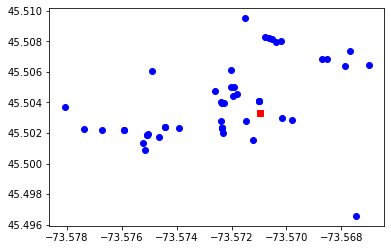

In [56]:
# Visualize locations
plt.plot(df4.longitude[0],df4.latitude[0],c='r',marker='s')
plt.scatter(df4.longitude[1:],df4.latitude[1:],c='b')

In [57]:
df4_array=np.array(df4.iloc[:,1:3])

In [58]:
# Calculate Manhattan distance for each pair of locations
from scipy.spatial.distance import cityblock
N=len(df4_array)
d_Manhattan=[]
for i in range(N):
    tls=[]
    for j in range(N):
        tls.append(cityblock(df4_array[i,:],df4_array[j,:]))
    d_Manhattan.append(tls)

# Manhattan Distance Matrix    
d_Manhattan=np.asarray(d_Manhattan)

In [59]:
n = len(d_Manhattan)
n

51

In [60]:
# The capacity of a delivery vehicle
Q = 50  
# simulate customer delivery demand
np.random.seed(0)
q = {i: np.random.choice(np.arange(1,8),p=[0.5,0.25,0.15,0.05,0.025,0.015,0.01]) for i in range(1, n)}
# simulate customer pickup demand
np.random.seed(1)
b = {i: np.random.choice(np.arange(1,8)) for i in range(1, n)}

In [61]:
# Simulate Time Windows
np.random.seed(0)
# start of time window
w_a = [0] + [np.random.choice([9,10,11],p=[0.6,0.3,0.1]) for i in range(1,n)] # in hours, 9 means 9 am
np.random.seed(0)
# end of time window
w_b = [0] + [np.random.choice([12,13,14],p=[1/3,1/3,1/3]) for i in range(1,n)] # in hours, 12 means 12 pm
np.random.seed(0)
# simulate service time at each location (amount of time that the vehicle has to stay in that location)
s = [0] + [np.random.choice([5/60,10/60,0.75],p=[0.6,0.3,0.1]) for i in range(1,n)] # in hours
# approximate travel time matrix in hours (assume average travel speed = 30 km/h)
t = d_Manhattan*(10000/90)/30

In [62]:
model4 = gp.Model("CVRPDPTW")

Academic license - for non-commercial use only - expires 2022-09-25
Using license file /Users/jiahua/gurobi.lic


In [63]:
# Define decision variables

# representing an arc from location i to j
x = model4.addVars(n, n, lb = 0, ub = 1, vtype=GRB.BINARY, name = ["x_"+str(i)+"_"+str(j) for i in range(n) for j in range(n)])
# representing the total delivery amount on vehicle on arc ij
R = model4.addVars(n, n, lb = 0,vtype=GRB.INTEGER,name=['R('+str(i)+","+str(j)+")" for i in range(n) for j in range(n)]) 
# representing the total pickup amount on vehicle on arc ij
P = model4.addVars(n, n, lb = 0,vtype=GRB.INTEGER,name=['P('+str(i)+","+str(j)+")" for i in range(n) for j in range(n)]) 
# representing the time instant that the service starts at location i
w = model4.addVars(n, lb = 0, vtype=GRB.CONTINUOUS, name = ["w_"+str(i) for i in range(n)])
# a large number 
M = 10000

In [64]:
# Objective Function
model4.setObjective(sum(d_Manhattan[i,j]*x[i,j] for i in range(n) for j in range(n)), GRB.MINIMIZE)

In [65]:
# Add constraints

# 4.1: must enter each *customer* location exactly once (excluding the depot)
for j in range(1,n):
    model4.addConstr(sum(x[i,j] for i in range(n)) == 1)
    
# 4.2: must exit each *customer* location exactly once (excluding the depot)
for i in range(1,n):
    model4.addConstr(sum(x[i,j] for j in range(n)) == 1)

# 4.3: avoid self-loops
for i in range(n):
    model4.addConstr(x[i,i] == 0)

# 4.4, 4.5: Ensure the flow conservation (also prevent subtours)
for j in range(1,n):
    model4.addConstr(sum(R[i,j] for i in range(n)) - q[j] == sum(R[j,i] for i in range(n)))
    model4.addConstr(sum(P[i,j] for i in range(n)) + b[j] == sum(P[j,i] for i in range(n)))

# 4.6: Vehicles depart from depot with zero pickup load 
model4.addConstr(sum(P[0,i] for i in range(1,n))==0)

# 4.7: Vehicles return to depot with zero delivery load
model4.addConstr(sum(R[i,0] for i in range(1,n))==0)

# 4.8: must not exceed maximum vehicle capacity at all time
for i in range(n):
    for j in range(n):
        model4.addConstr(R[i,j]+P[i,j] <= Q*x[i,j])

# 4.9: update service start time and avoid subtours (from time perspective)
for i in range(n):
    for j in range(1,n):
        model4.addConstr(w[j] >= w[i] + (s[i]+ t[i,j])*x[i,j] - M * (1-x[i,j]))

# 4.10: constraints on serivce start time, must be within time window  
for i in range(n):
    model4.addConstr(w[i] >= w_a[i])
    model4.addConstr(w[i] <= w_b[i])

In [66]:
model4.Params.MIPGap = 0.1
model4.Params.TimeLimit = 1000  # seconds
model4.optimize()

Changed value of parameter MIPGap to 0.1
   Prev: 0.0001  Min: 0.0  Max: inf  Default: 0.0001
Changed value of parameter TimeLimit to 1000.0
   Prev: inf  Min: 0.0  Max: inf  Default: inf
Gurobi Optimizer version 9.1.2 build v9.1.2rc0 (mac64)
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads
Optimize a model with 5506 rows, 7854 columns and 30706 nonzeros
Model fingerprint: 0x6b18df69
Variable types: 51 continuous, 7803 integer (2601 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+04]
  Objective range  [1e-06, 2e-02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+04]
Presolve removed 406 rows and 354 columns
Presolve time: 0.20s
Presolved: 5100 rows, 7500 columns, 29600 nonzeros
Variable types: 50 continuous, 7450 integer (2450 binary)
Found heuristic solution: objective 0.4204809

Root relaxation: objective 6.799821e-02, 8609 iterations, 0.56 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Exp

  1690  1071    0.07844   47  301    0.08780    0.07549  14.0%   629  396s
  1768  1120    0.08270   68  214    0.08780    0.07552  14.0%   614  404s
  1870  1116    0.07587   24  425    0.08780    0.07552  14.0%   592  413s
H 1876  1070                       0.0874301    0.07552  13.6%   594  413s
  1900  1099    0.07943   31  361    0.08743    0.07552  13.6%   591  418s
  1964  1099    0.07638   27  412    0.08743    0.07552  13.6%   585  425s
H 1975  1067                       0.0874279    0.07552  13.6%   586  425s
  1988  1088    0.07829   39  330    0.08743    0.07554  13.6%   586  432s
  2028  1101    0.07586   26  470    0.08743    0.07554  13.6%   589  439s
  2054  1125    0.07734   34  387    0.08743    0.07554  13.6%   595  446s
  2095  1149    0.07654   27  422    0.08743    0.07554  13.6%   602  453s
  2147  1137    0.07688   30  399    0.08743    0.07554  13.6%   605  460s
  2153  1181    0.07711   31  400    0.08743    0.07554  13.6%   610  467s
  2205  1189    0.07770  

<Figure size 864x864 with 0 Axes>

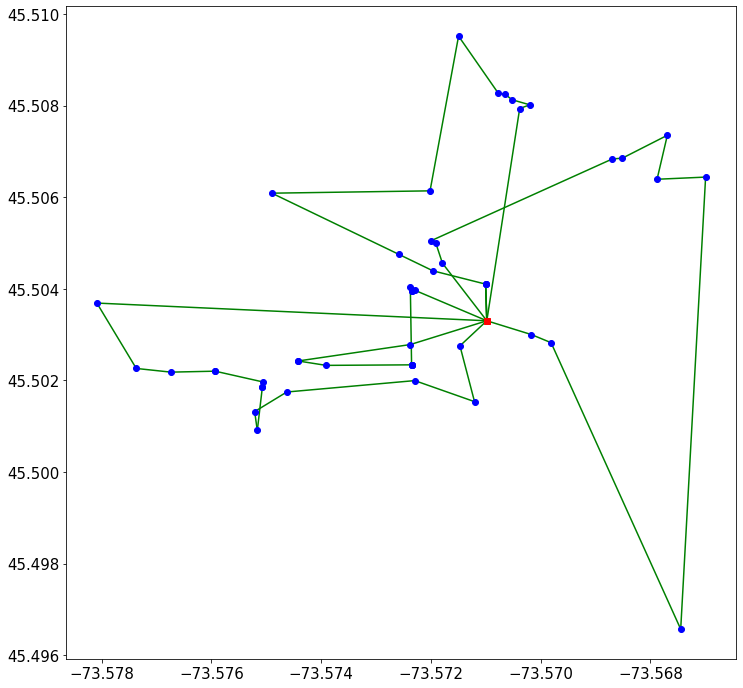

In [67]:
active_arcs = [a for a in [(i,j) for i in range(n) for j in range(n)] if x[a].x > 0.99]
yc=df4_array[:,0]
xc=df4_array[:,1]
plt.figure(figsize=(12,12))
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.figure(figsize=(12,12))
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
for i, j in active_arcs:
    plt.plot([xc[i], xc[j]], [yc[i], yc[j]], c='g', zorder=0)
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c='b')

In [68]:
# the conversion factor for location coordinates: 10,000km per 90 degrees. 
print(round(model4.objVal*(10000/90),2),'km')

9.71 km


In [69]:
for var in model4.getVars():
    if var.x > 0: # just print the decision variables that really matters(non zero)
        print(var.varName, "=", round(var.x,2))

x_0_11 = 1.0
x_0_15 = 1.0
x_0_17 = 1.0
x_0_31 = 1.0
x_0_45 = 1.0
x_1_9 = 1.0
x_2_22 = 1.0
x_3_4 = 1.0
x_4_21 = 1.0
x_5_35 = 1.0
x_6_5 = 1.0
x_7_8 = 1.0
x_8_36 = 1.0
x_9_50 = 1.0
x_10_7 = 1.0
x_11_6 = 1.0
x_12_13 = 1.0
x_13_14 = 1.0
x_14_0 = 1.0
x_15_16 = 1.0
x_16_18 = 1.0
x_17_20 = 1.0
x_18_24 = 1.0
x_19_42 = 1.0
x_20_19 = 1.0
x_21_0 = 1.0
x_22_43 = 1.0
x_23_2 = 1.0
x_24_27 = 1.0
x_25_32 = 1.0
x_26_28 = 1.0
x_27_26 = 1.0
x_28_29 = 1.0
x_29_3 = 1.0
x_30_39 = 1.0
x_31_25 = 1.0
x_32_33 = 1.0
x_33_30 = 1.0
x_34_10 = 1.0
x_35_34 = 1.0
x_36_1 = 1.0
x_37_12 = 1.0
x_38_23 = 1.0
x_39_38 = 1.0
x_40_0 = 1.0
x_41_40 = 1.0
x_42_46 = 1.0
x_43_0 = 1.0
x_44_0 = 1.0
x_45_44 = 1.0
x_46_48 = 1.0
x_47_49 = 1.0
x_48_47 = 1.0
x_49_37 = 1.0
x_50_41 = 1.0
R(0,11) = 27.0
R(0,15) = 27.0
R(0,17) = 23.0
R(0,31) = 21.0
R(0,45) = 3.0
R(1,9) = 9.0
R(2,22) = 5.0
R(3,4) = 8.0
R(4,21) = 6.0
R(5,35) = 21.0
R(6,5) = 22.0
R(7,8) = 16.0
R(8,36) = 13.0
R(9,50) = 4.0
R(10,7) = 17.0
R(11,6) = 24.0
R(12,13) = 6.0
R(13,14) = 4.

In [70]:
var_name = [var.varName for var in model4.getVars() if var.x > 0]

In [71]:
x_0_ = [varname for varname in var_name if "x_0_" in varname]

In [72]:
# show the optimal route for each vehicle
count = 1
for i in x_0_:
    end = i.split("_")[2] 
    route = [0, " > "]
    for k in range(len(x_0_)+n-1):
        for j in var_name[:len(x_0_)+n-1]:
            start = j.split("_")[1]
            if start == end:
                route.append(int(start))
                route.append(" > ")
                end = j.split("_")[2]
        if end == "0":
            break
     
    route.append(0)
    print("The optimal delivery route for vehicle "+str(count))
    print(*route, sep="")
    count += 1        

The optimal delivery route for vehicle 1
0 > 11 > 6 > 5 > 35 > 34 > 10 > 7 > 8 > 36 > 1 > 9 > 50 > 41 > 40 > 0
The optimal delivery route for vehicle 2
0 > 15 > 16 > 18 > 24 > 27 > 26 > 28 > 29 > 3 > 4 > 21 > 0
The optimal delivery route for vehicle 3
0 > 17 > 20 > 19 > 42 > 46 > 48 > 47 > 49 > 37 > 12 > 13 > 14 > 0
The optimal delivery route for vehicle 4
0 > 31 > 25 > 32 > 33 > 30 > 39 > 38 > 23 > 2 > 22 > 43 > 0
The optimal delivery route for vehicle 5
0 > 45 > 44 > 0
